# DATA605: Assignment 7

- [Assignment link](https://github.com/data602sps/datasetspractice/blob/main/07_assignment.ipynb)

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Import
Importing our dataset for this assignment. [This dataset](https://catalog.data.gov/dataset/electric-vehicle-population-data) from [opendata.gov](https://www.data.gov/) shows Electric Vehicle (EV) population data from Washington State. From this data I want to get a sense of the range of different types of EVs, as well as how cost

I am interested in this dataset as an evironmentalist. I also am interested in the economics of EVs, and how the price (`Base MSRP`) can impact different factors in the vehicle's performance and availability.

In [79]:
# Reading in data
filepath = "../data/electric_vehicles_wa.csv"

df = pd.read_csv(filepath)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),NaN,5.180008e+10
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),NaN,5.159000e+10
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),NaN,5.171001e+10


## Data Exploration
We can use the `describe` method to

In [80]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,99998.000000,100000.000000,100000.000000,100000.000000,99762.000000,1.000000e+05,9.999800e+04
mean,98167.371857,2019.297750,81.232290,1628.034150,29.613560,2.028363e+08,5.297330e+10
std,2477.438271,2.963137,100.858054,10035.838529,14.749657,8.969484e+07,1.629008e+09
min,3804.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.101001e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.523795e+08,5.303301e+10
50%,98122.000000,2020.000000,25.000000,0.000000,34.000000,1.967443e+08,5.303303e+10
75%,98370.000000,2022.000000,200.000000,0.000000,43.000000,2.258313e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,184400.000000,49.000000,4.792548e+08,5.603300e+10


In [81]:
# Missing values
df.isna()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Data Cleaning

We should coerce our column names to `snake_case`. In addition, we should make relevant columns `int` type, for when we want to do calculation/aggregation later.

**1. Column manipulation**

In [82]:
# Column name cleaning: Postal Cose -> postal_code
# edge cases first
df['clean_alternative_eligible'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
df['vehicle_id'] = df['VIN (1-10)']

df = df.drop(['VIN (1-10)', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'], axis=1)

# coerce to snake_case
new_cols = [c.replace(" ", "_").lower() for c in df.columns]
df.columns = new_cols


**2. Structure Fixes**

In [83]:
# Type cleaning: numeric columns should be integer type
int_cols = ['electric_range', 'base_msrp']

for i in int_cols:
    df[i] = df[i].astype(int)

In [84]:
df.head()

,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,clean_alternative_eligible,vehicle_id
0,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),215,0,NaN,476647986,POINT (-76.42443 36.8752),NaN,5.180008e+10,Clean Alternative Fuel Vehicle Eligible,5YJ3E1EB2J
1,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,Clean Alternative Fuel Vehicle Eligible,5YJ3E1ECXL
2,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,Clean Alternative Fuel Vehicle Eligible,WA1LAAGE7M
3,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220,0,NaN,168513922,POINT (-79.4172 36.58598),NaN,5.159000e+10,Clean Alternative Fuel Vehicle Eligible,5YJ3E1EA1K
4,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),19,0,NaN,150749378,POINT (-76.21549 36.92478),NaN,5.171001e+10,Not eligible due to low battery range,1FADP5CU9E


**3. Missing Values**
Our `electric_utility` column is missing some values. We can fill those NaNs with the string value None

In [85]:
df['electric_utility'] = df['electric_utility'].fillna("None")

**4. Create new columns based on existing columns or calculations**

One metric I'd be interested in is the MSRP dollar value of an electric vehicle per mile. Essentially, for longer range vehicles, how much more am I paying? We can derive this column from our `base_msrp` and `electric_range` columns

<AxesSubplot:>

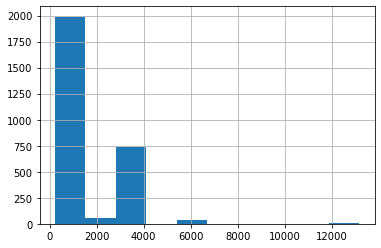

In [86]:
df['msrp_per_mile'] = df['base_msrp'] / df['electric_range']

# Plotting a histogram of these vals, using loc to get vehicles for which we have MSRP vals
df.loc[df['base_msrp'] > 0]['msrp_per_mile'].hist()

Also, a scatter plot would be nice to see the relationship of these variables. We can use the built-in `df.plot` method to accomplish this in a one-liner

<AxesSubplot:xlabel='electric_range', ylabel='base_msrp'>

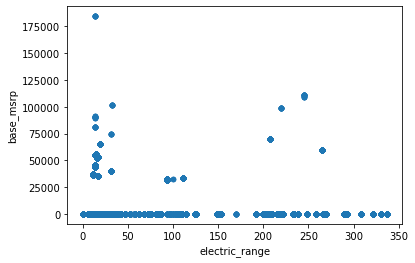

In [87]:
# Also want to get a scatter plot of MSRP vs Range

df.plot(x="electric_range", y="base_msrp", kind='scatter')

5. **Drop columns for your dataset**

We have duplicated `id` columns, so let's get rid of the `dol_vehicle_id` column and our census tract column

In [88]:
df = df.drop(['dol_vehicle_id', '2020_census_tract'], axis=1)

6. **Drop a row(s) from your dataset.**

In [89]:
# Dropping our first row for convenience
print(len(df))
df = df.iloc[0:-1]
print(len(df))

100000
99999


**7. Sort your data based on multiple variables.**

We can sort our original `df` by make and year, to easier view trends over time

In [90]:
df = df.sort_values(['make', 'model_year'])
df.head(10)

,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,electric_range,base_msrp,legislative_district,vehicle_location,electric_utility,clean_alternative_eligible,vehicle_id,msrp_per_mile
376,King,Kirkland,WA,98033.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,48.0,POINT (-122.2066 47.67887),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUUPBFF6G,0.0
1726,King,Seattle,WA,98144.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,37.0,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUTPBFF6G,0.0
1789,King,Vashon,WA,98070.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,34.0,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUUPBFF4G,0.0
2911,King,Seattle,WA,98112.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,37.0,POINT (-122.30716 47.62687),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUTPBFF7G,0.0
3448,King,Seattle,WA,98125.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,46.0,POINT (-122.3026 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUTPBFF4G,0.0
3633,Snohomish,Bothell,WA,98021.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,1.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,Not eligible due to low battery range,WAUUPBFF7G,0.0
3735,King,Seattle,WA,98115.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,46.0,POINT (-122.31765 47.70013),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUSPBFF9G,0.0
3787,King,Seattle,WA,98144.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,37.0,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUTPBFF3G,0.0
4537,King,Auburn,WA,98001.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,30.0,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUTPBFF4G,0.0
6358,Whatcom,Lynden,WA,98264.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,42.0,POINT (-122.45079 48.9429),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,Not eligible due to low battery range,WAUTPBFF2G,0.0


**8. Filter your data based on some condition.**

Let's create a new dataframe with only data from *non-Tesla* automakers (Audi, Ford, etc). Creating a new df preserves our old one in memory so we won't have to re-instantiate our original data manipulations.

In [91]:
df_alt = df.loc[df['make'] != "TESLA"]
df_alt.head()

,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,electric_range,base_msrp,legislative_district,vehicle_location,electric_utility,clean_alternative_eligible,vehicle_id,msrp_per_mile
376,King,Kirkland,WA,98033.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,48.0,POINT (-122.2066 47.67887),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUUPBFF6G,0.0
1726,King,Seattle,WA,98144.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,37.0,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUTPBFF6G,0.0
1789,King,Vashon,WA,98070.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,34.0,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUUPBFF4G,0.0
2911,King,Seattle,WA,98112.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,37.0,POINT (-122.30716 47.62687),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUTPBFF7G,0.0
3448,King,Seattle,WA,98125.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,46.0,POINT (-122.3026 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Not eligible due to low battery range,WAUTPBFF4G,0.0


**9. Convert all the string values to upper or lower cases in one column.**
Converting our `clean_alternative_eligible` column to lowercase values

In [92]:
df.clean_alternative_eligible = df.clean_alternative_eligible.str.lower()
df.clean_alternative_eligible.head()

376     not eligible due to low battery range
1726    not eligible due to low battery range
1789    not eligible due to low battery range
2911    not eligible due to low battery range
3448    not eligible due to low battery range
Name: clean_alternative_eligible, dtype: object

**10. Check whether numeric values are present in a given column of your dataframe.**

We can use the `isnumeric` method to accomplish this

In [100]:

# Checking whether our ID column is numeric
df.vehicle_id.str.isnumeric()


376      False
1726     False
1789     False
2911     False
3448     False
         ...  
98606    False
98861    False
33380    False
62803    False
73239    False
Name: vehicle_id, Length: 99999, dtype: bool

**11. Group your dataset by one column, and get the mean, min, and max values by group.**

Let's group by our `make` column to get a sense of these values per auto-maker

In [94]:
makes = df.groupby("make")

In [96]:
makes['base_msrp'].mean()

make
AUDI                         0.000000
AZURE DYNAMICS               0.000000
BENTLEY                      0.000000
BMW                       4784.831204
CADILLAC                  8533.522727
CHEVROLET                    0.000000
CHRYSLER                  2587.426015
FIAT                         0.000000
FISKER                  102000.000000
FORD                         0.000000
GENESIS                      0.000000
HONDA                        0.000000
HYUNDAI                      0.000000
JAGUAR                       0.000000
JEEP                         0.000000
KIA                       4416.790949
LAND ROVER                   0.000000
LEXUS                        0.000000
LINCOLN                      0.000000
LUCID MOTORS                 0.000000
MERCEDES-BENZ                0.000000
MINI                      7518.067979
MITSUBISHI                   0.000000
NISSAN                       0.000000
POLESTAR                     0.000000
PORSCHE                   4795.060080
RIVIAN 

In [98]:
makes['base_msrp'].min()

make
AUDI                         0
AZURE DYNAMICS               0
BENTLEY                      0
BMW                          0
CADILLAC                     0
CHEVROLET                    0
CHRYSLER                     0
FIAT                         0
FISKER                  102000
FORD                         0
GENESIS                      0
HONDA                        0
HYUNDAI                      0
JAGUAR                       0
JEEP                         0
KIA                          0
LAND ROVER                   0
LEXUS                        0
LINCOLN                      0
LUCID MOTORS                 0
MERCEDES-BENZ                0
MINI                         0
MITSUBISHI                   0
NISSAN                       0
POLESTAR                     0
PORSCHE                      0
RIVIAN                       0
SMART                        0
SUBARU                       0
TESLA                        0
TH!NK                        0
TOYOTA                       0
VOL

In [99]:
makes['base_msrp'].max()

make
AUDI                         0
AZURE DYNAMICS               0
BENTLEY                      0
BMW                      91250
CADILLAC                 75095
CHEVROLET                    0
CHRYSLER                 39995
FIAT                         0
FISKER                  102000
FORD                         0
GENESIS                      0
HONDA                        0
HYUNDAI                      0
JAGUAR                       0
JEEP                         0
KIA                      33950
LAND ROVER                   0
LEXUS                        0
LINCOLN                      0
LUCID MOTORS                 0
MERCEDES-BENZ                0
MINI                     36900
MITSUBISHI                   0
NISSAN                       0
POLESTAR                     0
PORSCHE                 184400
RIVIAN                       0
SMART                        0
SUBARU                   34995
TESLA                   110950
TH!NK                        0
TOYOTA                       0
VOL

**12. Group your dataset by two columns and then sort the aggregated results within the groups.**

We can get a second aggregation over make and model

In [108]:
make_models = df.sort_values(['make', 'model']).groupby(["make", "model"])

# Want to see average range per make and model
avg_range_by_make_model = make_models['electric_range'].mean()

avg_range_by_make_model

make                  model    
AUDI                  A3            16.000000
                      A7            24.000000
                      A8 E          17.000000
                      E-TRON       127.420373
                      E-TRON GT      0.000000
                                      ...    
VOLVO                 V60           25.166667
                      XC40           0.000000
                      XC60          20.719298
                      XC90          19.303625
WHEEGO ELECTRIC CARS  WHEEGO       100.000000
Name: electric_range, Length: 117, dtype: float64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

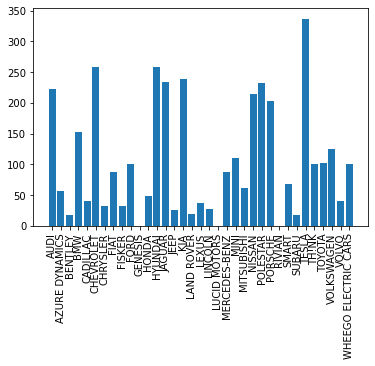

In [111]:
# Want to see average range per make and model
plt.bar(df['make'], df['electric_range'])
plt.xticks(rotation=90)

## Further Investigation

This dataset includes location data (`vehicle_location` and `postal_code`), it'd be interesting to create a choropleth plot including price based on location. This could give some insight into how different areas in Washington state are doing economically.

## Conclusions

Overall, we can see that for vehicles for which we have data, we still are seeing fairly large MSRP values for EVs in washington state. This is a [sticking point for larger-scale adoption](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiWiJ_5oOn9AhU9F1kFHdS-CoUQFnoECAwQAQ&url=https%3A%2F%2Fwww.mckinsey.com%2Findustries%2Fautomotive-and-assembly%2Four-insights%2Felectric-vehicles-are-here-and-large-scale-adoption-is-near&usg=AOvVaw1iryHBHvwtKBu7iQ2zglZb) of this option for transportation in the US, as more expensive EVs will not be fully adopted until they are as cost-effective as petroleum vehicles.